In [1]:
import numpy as np
import matplotlib.pyplot as plt

from CyRK import __version__, nbsolve_ivp, pysolve_ivp
from CyRK.cy.cysolver_test import cytester 

print("CyRK", __version__)

from performance import diffeqs
del diffeqs['Lorenz-ExtraOut']

CyRK 0.13.0


## CyRK - pysolve_ivp

265 μs ± 1.35 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
size = 57


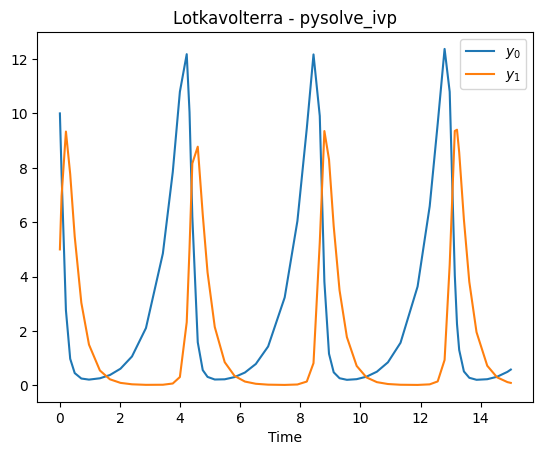

166 μs ± 740 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
size = 43


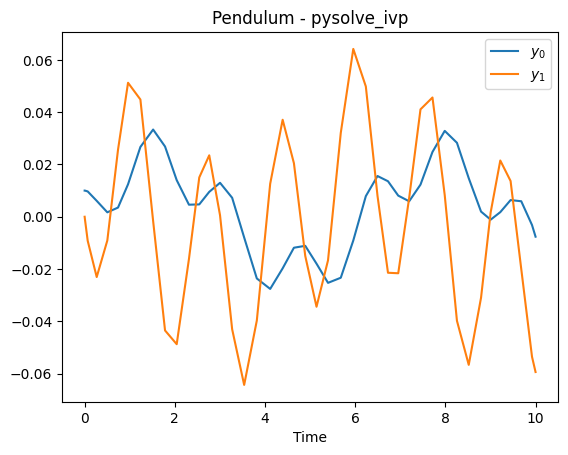

380 μs ± 2.56 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
size = 89


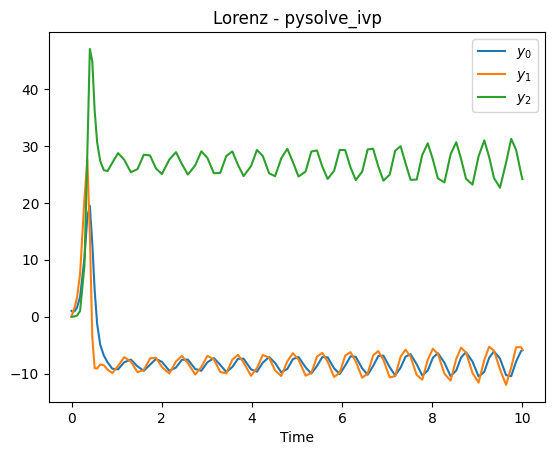

In [2]:
for diffeq_name, (cy_diffeq, nb_diffeq, args_, y0, timespans, CySolverDiffeqInt) in diffeqs.items():
            
    time_span = timespans[0]
    result = pysolve_ivp(cy_diffeq, time_span, y0, args=args_, method='RK45', pass_dy_as_arg=True)
    %timeit pysolve_ivp(cy_diffeq, time_span, y0, args=args_, method='RK45', pass_dy_as_arg=True)
    print("size =", result.t.size)
    y_len = result.num_y
        
    
    fig, ax = plt.subplots()
    for i in range(y_len):
        ax.plot(result.t, result.y[i, :], label=f'$y_{i}$')
    ax.set(title=f'{diffeq_name} - pysolve_ivp', xlabel='Time')
    ax.legend(loc='best')
    plt.show()
    

## CyRK - CySolver

16.6 μs ± 21.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
size = 57


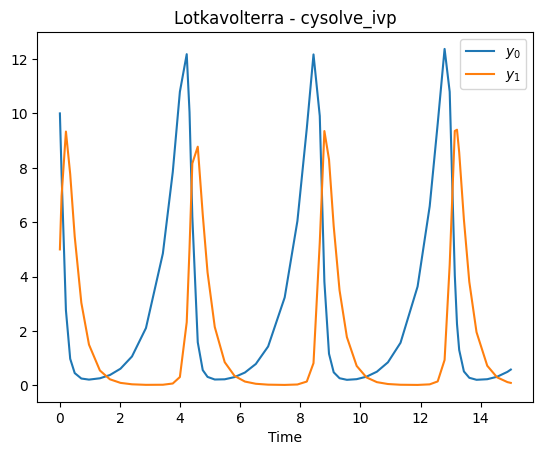

16.2 μs ± 56.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
size = 43


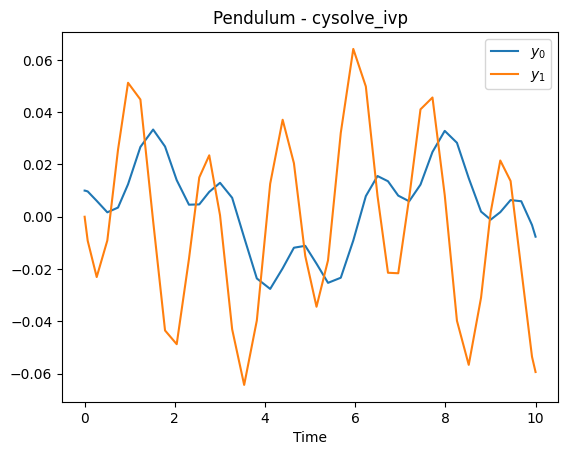

26.1 μs ± 170 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
size = 89


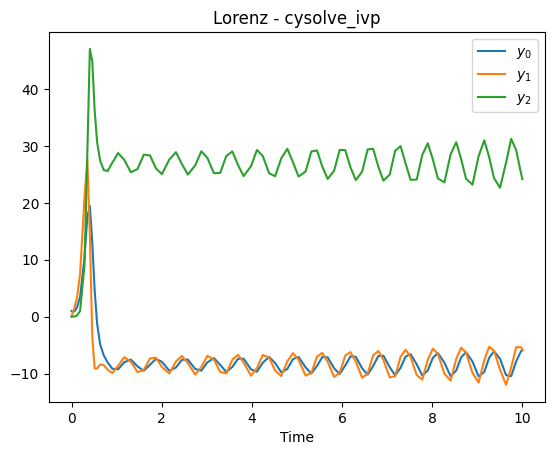

In [3]:
for diffeq_name, (cy_diffeq, nb_diffeq, args_, y0, timespans, CySolverDiffeqInt) in diffeqs.items():
            
    time_span = timespans[0]
    args_arr = np.asarray(args_)
    result = cytester(CySolverDiffeqInt, time_span, y0, args=args_arr, method=1)
    %timeit cytester(CySolverDiffeqInt, time_span, y0, args=args_arr, method=1)
    print("size =", result.t.size)
    y_len = result.num_y
        
    
    fig, ax = plt.subplots()
    for i in range(y_len):
        ax.plot(result.t, result.y[i, :], label=f'$y_{i}$')
    ax.set(title=f'{diffeq_name} - cysolve_ivp', xlabel='Time')
    ax.legend(loc='best')
    plt.show()

## CyRK - nbsolve_ivp

269 μs ± 2.53 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
size = 57


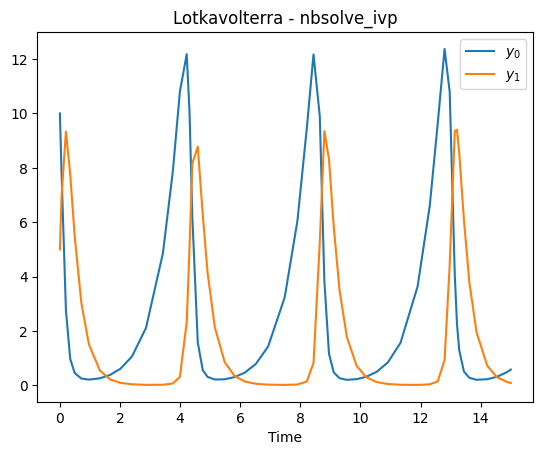

228 μs ± 1.64 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
size = 43


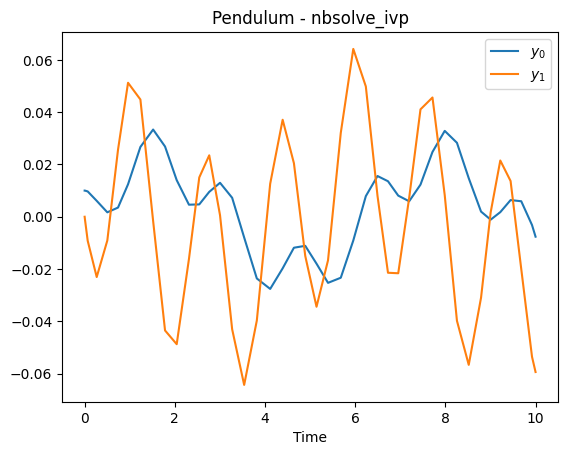

280 μs ± 3.39 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
size = 89


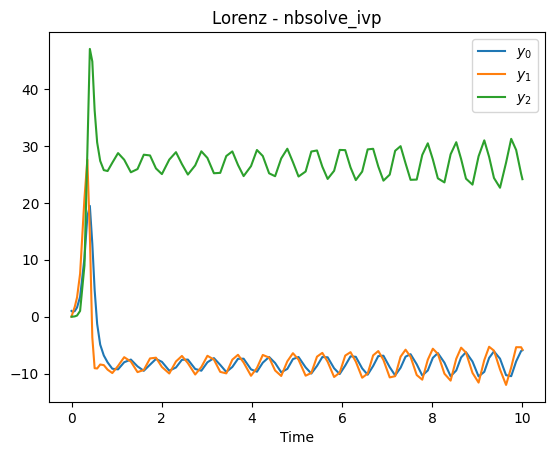

In [4]:
for diffeq_name, (cy_diffeq, nb_diffeq, args_, y0, timespans, CySolverDiffeqInt) in diffeqs.items():
    
    time_span = timespans[0]
    result = nbsolve_ivp(nb_diffeq, time_span, y0, args_, rk_method=1)
    %timeit nbsolve_ivp(nb_diffeq, time_span, y0, args_, rk_method=1)
    print("size =", result.t.size)
    y_len = result.num_y
    
    fig, ax = plt.subplots()
    for i in range(y_len):
        ax.plot(result.t, result.y[i, :], label=f'$y_{i}$')
    ax.set(title=f'{diffeq_name} - nbsolve_ivp', xlabel='Time')
    ax.legend(loc='best')
    plt.show()